In [64]:
import tensorflow as tf

In [75]:
import numpy as np
import cv2
import os
from tqdm import tqdm

In [76]:
from keras import layers
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [77]:
from keras.applications import ResNet50,MobileNet, DenseNet201, InceptionV3, NASNetLarge, InceptionResNetV2, NASNetMobile


In [78]:
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam

#importing libraries required

C:\Users\geeta\AppData\Local\Temp\ipykernel_13856\1030941904.py:45: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = ImageOps.fit(images[i], (100, 100), Image.ANTIALIAS)


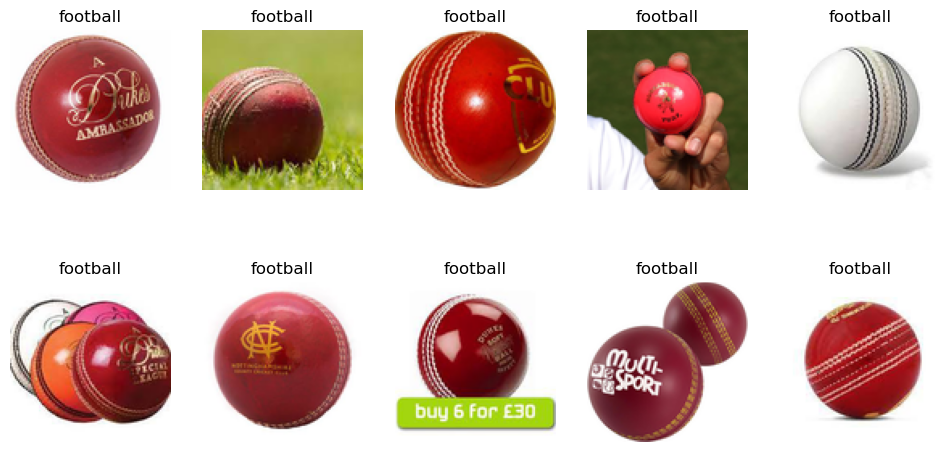

In [79]:
from PIL import Image, ImageOps
import os
import matplotlib.pyplot as plt

# Path to your dataset directory
dataset_dir = r'C:\Users\geeta\Desktop\BALLS'

# List of subdirectories (classes) in the dataset directory
subdirectories = ['train', 'test']

# Load images from each subdirectory
images = []
labels = []

#looping both the subdirectories
for subdirectory in subdirectories:
    
    #constructing path to the sub directory 
    #and listing all the classes
    subdirectory_path = os.path.join(dataset_dir, subdirectory)
    classes = os.listdir(subdirectory_path)
    
    #by iteratig over every class
    for class_name in classes:
        class_dir = os.path.join(subdirectory_path, class_name)
        #iterates over every image 
        for image_name in os.listdir(class_dir):
            #constructs the full path to the current image file.
            image_path = os.path.join(class_dir, image_name)
            try:
                #opens the image file using the PIL Image.open method.
                with Image.open(image_path) as image:
                    images.append(image.copy())
                    #to assign aa class nam
                    labels.append(class_name) 
            except PermissionError as e:
                #if no image is noted gives error of permission error
                print(f"Permission error: {e}")

#just to check whether the images are imported or not
# Display up to 10 images or fewer if there are fewer than 10 images
num_images_to_display = min(len(images), 10) 
 # Display up to 10 images or fewer if there are fewer than 10 images
num_cols = min(num_images_to_display, 5) 
num_rows = (num_images_to_display - 1) 

#creating a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))
#iterates over each and every ssubplot
for i, ax in enumerate(axes.flatten()):
    
    if i < num_images_to_display:
        # Resize image to a common size to (100*100)
        resized_image = ImageOps.fit(images[i], (100, 100), Image.ANTIALIAS)
        #display it
        ax.imshow(resized_image)
        ax.set_title(labels[i]) 
        #for a clear display
        ax.axis('off')
    else:
        # Hide empty subplots
        ax.axis('off')  
# plotting the images
plt.show()

In [80]:
#Transferring 'jpg' images to an array of IMG
def Dataset_loader(DIR, RESIZE, sigmaX=10):
    #Creating empty list
    IMG = []
    #using lambda we have created a read func
    #this reads image and convert it into rgb
    #using PIL library
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    #looping over the files specified
    #tqdm function is used to create a progress bar for better visualization.
    for IMAGE_NAME in tqdm(os.listdir(DIR)):
        #full path to the current image file.
        PATH = os.path.join(DIR,IMAGE_NAME)
        # Splits the file name and extension
        #and stores the extension in the ftype variable.
        _, ftype = os.path.splitext(PATH)
        #read only if it  is jpg
        #resie it
        #reduce it size to b/w 0 to 1
        if ftype == ".jpg":
            img = read(PATH)
            img = cv2.resize(img, (RESIZE,RESIZE))
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            #img = cv2.equalizeHist(img)
            img = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)
            arr=np.array(img)
            
            img=img/255.0
            #arr1=np.repeat(arr[..., np.newaxis], 3, -1)
            IMG.append(arr)
            
    return IMG

#load the data set....
HP_train=np.array(Dataset_loader(r'C:\Users\geeta\Desktop\BALLS\train\headphones',224))
HP_test=np.array(Dataset_loader(r'C:\Users\geeta\Desktop\BALLS\test\headphones',224))
FB_train=np.array(Dataset_loader(r'C:\Users\geeta\Desktop\BALLS\train\football',224))
FB_test=np.array(Dataset_loader(r'C:\Users\geeta\Desktop\BALLS\test\football',224))

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 55.36it/s]


In [81]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
#this explaination is written in another page 
#along with pseudocode..which is kept as link in the pdf
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')  # Assuming 2 classes: 'headphones' and 'football'
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(np.concatenate((HP_train, FB_train)), 
                    np.concatenate((np.zeros(len(HP_train)), np.ones(len(FB_train)))),  # Assign labels 0 and 1
                    epochs=10, 
                    validation_data=(np.concatenate((HP_test, FB_test)), 
                                     np.concatenate((np.zeros(len(HP_test)), np.ones(len(FB_test))))))

# Evaluate the model
test_loss, test_acc = model.evaluate(np.concatenate((HP_test, FB_test)), 
                                     np.concatenate((np.zeros(len(HP_test)), np.ones(len(FB_test)))))
print(f"Test Accuracy: {test_acc}")

Epoch 1/10
2/2 [==============================] - 6s 2s/step - loss: 1496.6954 - accuracy: 0.4286 - val_loss: 714.4265 - val_accuracy: 0.5385
Epoch 2/10
2/2 [==============================] - 3s 1s/step - loss: 1306.3329 - accuracy: 0.4286 - val_loss: 661.5837 - val_accuracy: 0.4615
Epoch 3/10
2/2 [==============================] - 3s 1s/step - loss: 557.6344 - accuracy: 0.4286 - val_loss: 5.3085 - val_accuracy: 0.6923
Epoch 4/10
2/2 [==============================] - 2s 1s/step - loss: 8.8708 - accuracy: 0.6735 - val_loss: 7.3987 - val_accuracy: 0.5769
Epoch 5/10
2/2 [==============================] - 2s 1s/step - loss: 6.6959 - accuracy: 0.5714 - val_loss: 1.9233 - val_accuracy: 0.8462
Epoch 6/10
2/2 [==============================] - 2s 981ms/step - loss: 1.5784 - accuracy: 0.8571 - val_loss: 22.0550 - val_accuracy: 0.6154
Epoch 7/10
2/2 [==============================] - 2s 911ms/step - loss: 17.7620 - accuracy: 0.6327 - val_loss: 6.0314 - val_accuracy: 0.6538
Epoch 8/10
2/2 [=====

In [82]:
model.compile(loss='binary-crossentropy',optimizer='adam',metrics='accuracy')


1/1 [==============================] - 0s 190ms/step


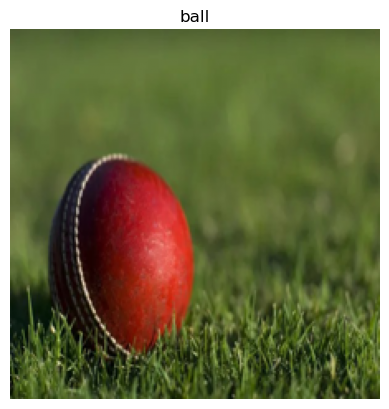

In [85]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load and preprocess the image
def preprocess_image(image_path, target_size):
    image = Image.open(image_path)
    image = image.resize(target_size)
    image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    return image[np.newaxis, ...]  # Add batch dimension

# Choose an image from your dataset or any other source
image_path = r'C:\Users\geeta\Desktop\crixc.jpg'  # Update with your image path
target_size = (224, 224)  # Same as the input shape of your model

# Preprocess the image
image = preprocess_image(image_path, target_size)

# Use your trained model to make a prediction
prediction = model.predict(image)
predicted_class = np.argmax(prediction)

# Display the image along with the predicted class label
class_names = ['headphones', 'ball']  # Assuming these are your class names

plt.imshow(np.squeeze(image))  # Display the image
plt.axis('off')  # Hide axes
plt.title(class_names[predicted_class])  # Display the predicted class label
plt.show()